<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 1 to 2
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 90 non-null     int64  
 3   Number_of_Warts      90 non-null     int64  
 4   Type                 90 non-null     int64  
 5   Area                 90 non-null     int64  
 6   induration_diameter  90 non-null     int64  
 7   Result_of_Treatment  59 non-null     float64
dtypes: float64(1), int64(7)
memory usage: 6.3 KB
None
             sex        age       Time  Number_of_Warts        Type  \
count  90.000000  90.000000  90.000000        90.000000   90.000000   
mean   31.044444   6.877778  28.122222         4.866667   42.066667   
std    12.235435   3.115124  30.205598         4.303644  121.891811   
min    15.000000   1.000000   1.000000         1.000000    1.0000

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15208\4198947852.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Result_of_Treatment', data=df_cleaned, palette='coolwarm')


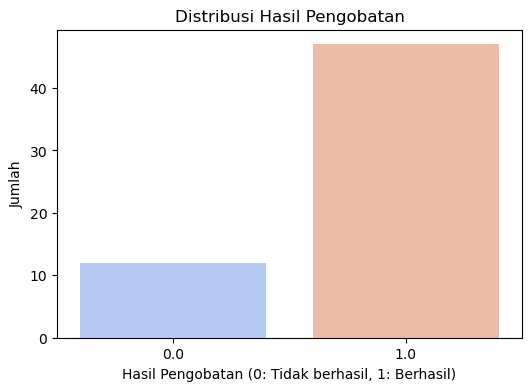

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15208\4198947852.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result_of_Treatment', y='age', data=df_cleaned, palette='coolwarm')


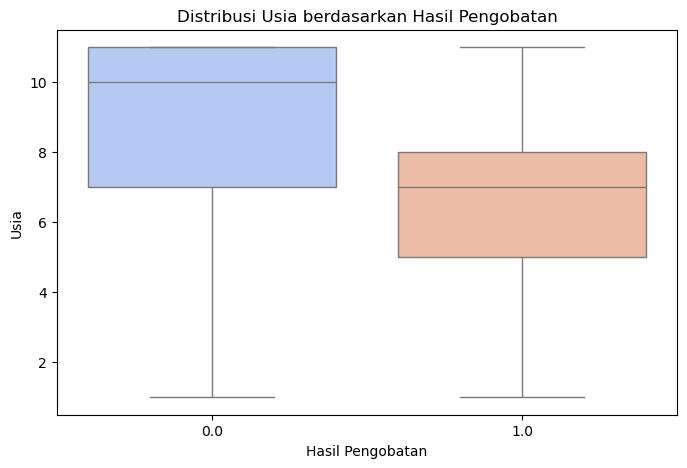

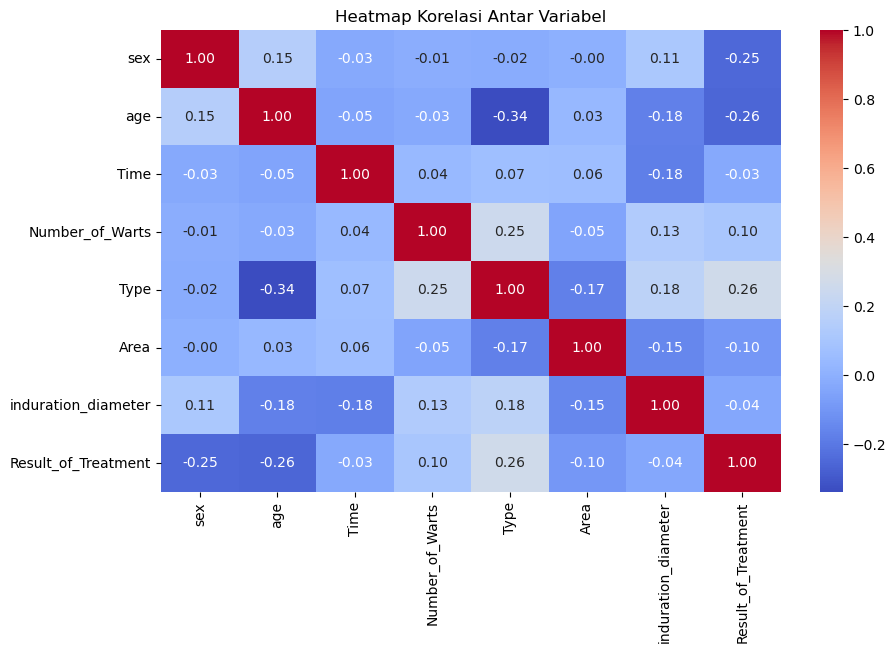


Akurasi Model Naive Bayes: 0.6666666666666666

Laporan Klasifikasi:
              precision    recall  f1-score   support

         0.0       0.50      0.25      0.33         4
         1.0       0.70      0.88      0.78         8

    accuracy                           0.67        12
   macro avg       0.60      0.56      0.56        12
weighted avg       0.63      0.67      0.63        12


Confusion Matrix:
[[1 3]
 [1 7]]


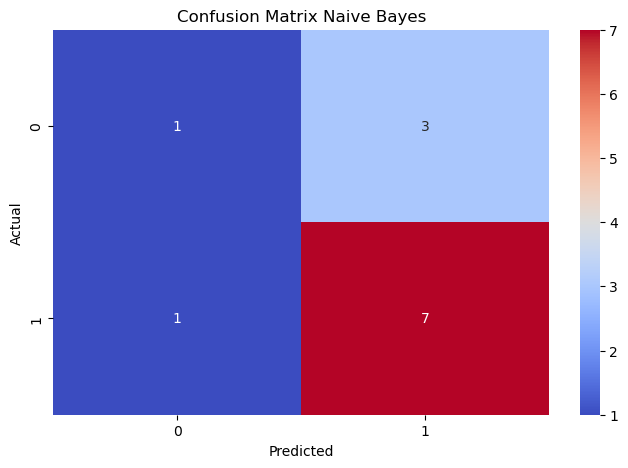

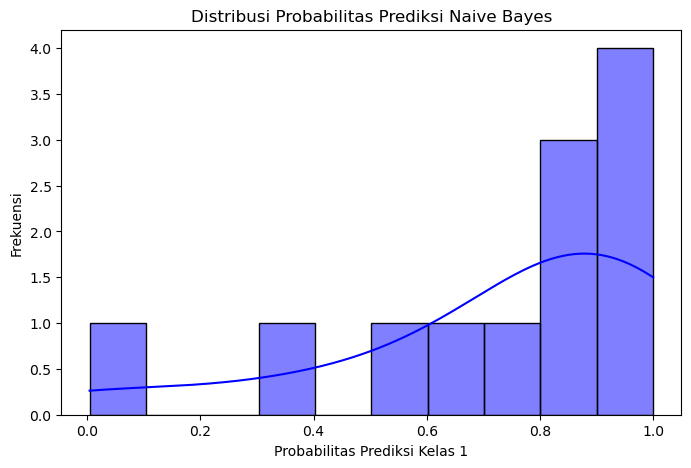

In [3]:
# file csv imunotherapi kedua nya sama saja isinya

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 2. Upload dan baca data
file_path = r'D:\data science\uas\imunotherapi.csv'  # Sesuaikan dengan lokasi file Anda
df = pd.read_csv(file_path)

# 3. Tampilkan deskripsi, struktur data, dan 5 data teratas
print(df.info())
print(df.describe())
print(df.head())

# 4. Lakukan pengecekan data
print("\nJumlah nilai yang hilang:")
print(df.isnull().sum())

# Hapus data dengan nilai kosong pada target
print("\nMenghapus baris dengan nilai kosong...")
df_cleaned = df.dropna(subset=['Result_of_Treatment'])
print(df_cleaned.isnull().sum())

# 5. Analisis EDA dengan grafik
plt.figure(figsize=(6, 4))
sns.countplot(x='Result_of_Treatment', data=df_cleaned, palette='coolwarm')
plt.title('Distribusi Hasil Pengobatan')
plt.xlabel('Hasil Pengobatan (0: Tidak berhasil, 1: Berhasil)')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi hubungan antara usia dan hasil pengobatan
plt.figure(figsize=(8, 5))
sns.boxplot(x='Result_of_Treatment', y='age', data=df_cleaned, palette='coolwarm')
plt.title('Distribusi Usia berdasarkan Hasil Pengobatan')
plt.xlabel('Hasil Pengobatan')
plt.ylabel('Usia')
plt.show()

# 6. Analisis korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

# 7. Model Naive Bayes
X = df_cleaned.drop(columns=['Result_of_Treatment'])
y = df_cleaned['Result_of_Treatment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

y_pred = model_nb.predict(X_test)

# Evaluasi model
print("\nAkurasi Model Naive Bayes:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 8. Visualisasi model naive bayes
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', fmt='d')
plt.title("Confusion Matrix Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 9. Tampilkan grafik dari naive bayes
plt.figure(figsize=(8, 5))
probabilities = model_nb.predict_proba(X_test)
sns.histplot(probabilities[:, 1], bins=10, kde=True, color='blue')
plt.title("Distribusi Probabilitas Prediksi Naive Bayes")
plt.xlabel("Probabilitas Prediksi Kelas 1")
plt.ylabel("Frekuensi")
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15208\270276700.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df_cleaned, palette='coolwarm')


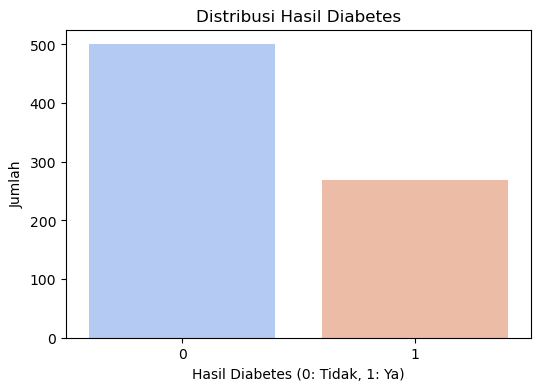

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15208\270276700.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Age', data=df_cleaned, palette='coolwarm')


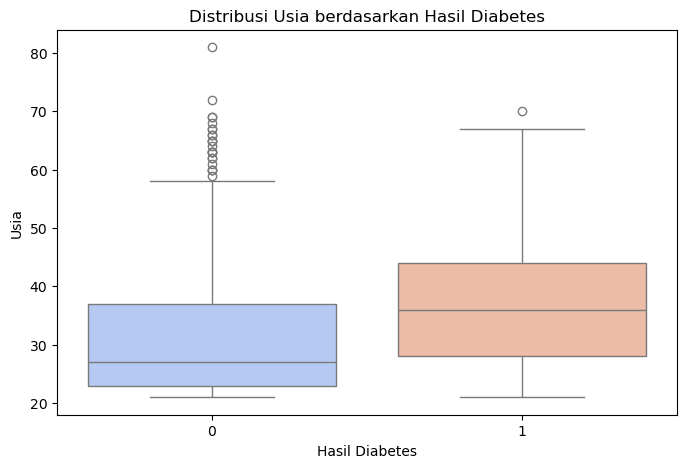

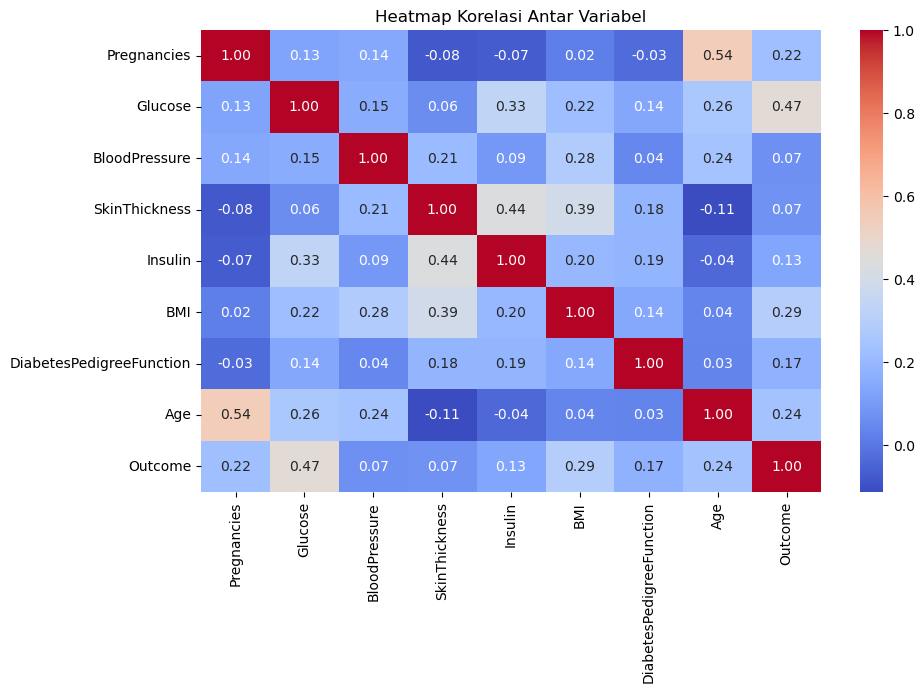


Akurasi Model Naive Bayes: 0.7662337662337663

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154


Confusion Matrix:
[[79 20]
 [16 39]]


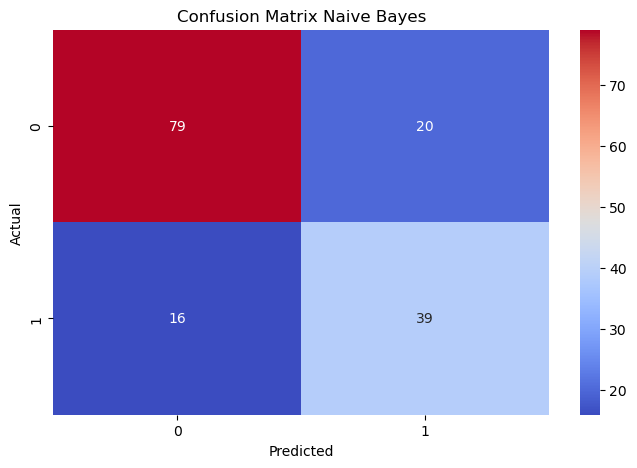

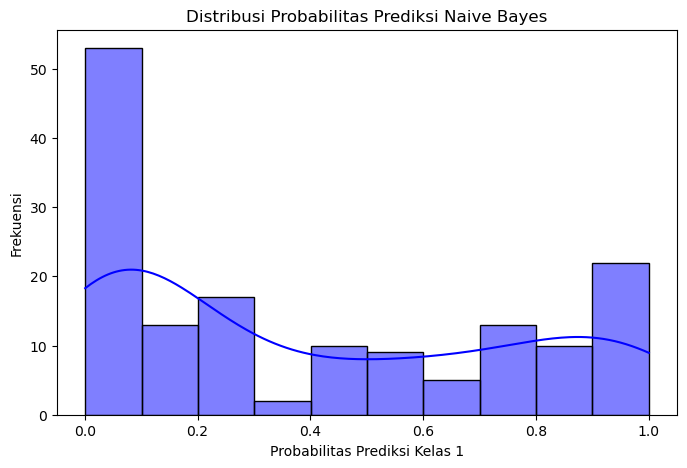

In [7]:
# file csv diabetes yang ini

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 2. Upload dan baca data
file_path = r'D:\data science\uas\diabetes.csv'  # Sesuaikan dengan lokasi file Anda
df = pd.read_csv(file_path)

# 3. Tampilkan deskripsi, struktur data, dan 5 data teratas
print(df.info())
print(df.describe())
print(df.head())

# 4. Lakukan pengecekan data
print("\nJumlah nilai yang hilang:")
print(df.isnull().sum())

# Hapus data dengan nilai kosong pada target
print("\nMenghapus baris dengan nilai kosong...")
df_cleaned = df.dropna(subset=['Outcome'])
print(df_cleaned.isnull().sum())

# 5. Analisis EDA dengan grafik
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df_cleaned, palette='coolwarm')
plt.title('Distribusi Hasil Diabetes')
plt.xlabel('Hasil Diabetes (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi hubungan antara usia dan hasil diabetes
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='Age', data=df_cleaned, palette='coolwarm')
plt.title('Distribusi Usia berdasarkan Hasil Diabetes')
plt.xlabel('Hasil Diabetes')
plt.ylabel('Usia')
plt.show()

# 6. Analisis korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

# 7. Model Naive Bayes
X = df_cleaned.drop(columns=['Outcome'])
y = df_cleaned['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

y_pred = model_nb.predict(X_test)

# Evaluasi model
print("\nAkurasi Model Naive Bayes:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 8. Visualisasi model naive bayes
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', fmt='d')
plt.title("Confusion Matrix Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 9. Tampilkan grafik dari naive bayes
plt.figure(figsize=(8, 5))
probabilities = model_nb.predict_proba(X_test)
sns.histplot(probabilities[:, 1], bins=10, kde=True, color='blue')
plt.title("Distribusi Probabilitas Prediksi Naive Bayes")
plt.xlabel("Probabilitas Prediksi Kelas 1")
plt.ylabel("Frekuensi")
plt.show()